
# Project: No-show appointments Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset is about the appointment of patients, whether they showed up or not. The dataset collects information from 100k medical appointments in Brazil. There are 14 columns in the dataset each given details of patients' appointments. Column Description: Patientid: Identification of a patient. AppointmentID: Identification of each appointment. Gender: Male or Female. Female is the greater proportion, woman takes way more care of they health in comparison to man. ScheduledDay: The day of the actual appointment, when they have to visit the doctor. AppointmentDay: The day someone called or registered the appointment, this is before appointment. Age: How old is the patient. Neighbourhood: Where the appointment takes place. Scholarship: Indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família. Hipertension: True or False. Diabetes: True or False. Alcoholism: True or False. Handcap: True or False SMS_received: 1 or more messages sent to the patient. No-show: True or False.

### Question(s) for Analysis

What is the gender distribution of patients? Does gender have an effect in show up? Does the age of the gender have an effect in show up? Does having a scholarship affect the number of show up for an appointment? Do the diseases affect whether a patient shows up or not?

In [1]:
# import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

In this section, the dataset in csv file is loaded to a pandas dataframe, the dataframe is therefore explored to know the number of rows and columns, checked for the summary statistics, trimmed, and then cleaned for analysis.

In [3]:
# Load dataset
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#check for the number of rows and columns
df.shape

(110527, 14)

The data has 115027 rows and 14 columns

In [5]:
#check for information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There are no NaNs (missing data) in the data PatientId and AppointmentId, Neighbourhood columns wouldn't be needed during exploratory analysis. ScheduledDay and AppointmentDay need to be converted to a DateTime. Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, Sms_recieved, No-show should be boolean data types.

In [6]:
#check for summary statistics
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000



### Data Cleaning

The above dataset after loading to check the structure of the data was passed for data cleaning. The problems checked were if there are any missing values and duplicated values. from the .info method, it was discovered that the dataset contains no missing values.

In [7]:
#check for duplicated columns
df.duplicated().sum()

0

Data has zero(0) duplicated value

In [8]:
#correct columns name
df.rename(columns = {'Hipertension':'Hypertension', 'No-show':'No_show'}, inplace=True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [9]:
#Drop Patientid, AppointmentID and Neighbourhood
df.drop(['PatientId', 'AppointmentID', 'Neighbourhood'], axis=1, inplace=True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,0,1,1,0,0,0,No


### Handling the data types
Here, scheduled Day and Appointment Day were converted to datetime. The hours 00:00:00 in the dataset were removed.

In [10]:
#extract only year, month and day and converting to datetime
for column in ['ScheduledDay', 'AppointmentDay']:
    df[column] = pd.to_datetime(df[column])

In [11]:
# convert Scholarship, Hipertension, Diabetes, Alcoholism, Sms_recieved to bool
cols = ['Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'SMS_received']
df[cols] = df[cols].astype(bool)
df[cols].dtypes

Scholarship     bool
Hypertension    bool
Diabetes        bool
Alcoholism      bool
SMS_received    bool
dtype: object

In [12]:
# map 'No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up
df.loc[df['No_show'] == 'No', 'No_show'] = 1
df.loc[df['No_show'] == 'Yes', 'No_show'] = 0

In [13]:
# convert No-show to boolean
df['No_show'] = df['No_show'].astype('bool')
df['No_show'].dtypes

dtype('bool')

In [14]:
#explore values below 0
df[df['Age'] < 0]

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
99832,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,False,False,False,False,0,False,True


In [15]:
# drop row with negative age
df.drop(df[df['Age'] < 0].index, inplace = True)
df[df['Age'] < 0]

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show


The Age column contained a negative value and was dropped for further analysis

In [16]:
#Recheck after analysis
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,False,True,False,False,0,False,True
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,False,False,False,False,0,False,True
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,False,False,False,False,0,False,True
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,False,False,False,False,0,False,True
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,False,True,True,False,0,False,True


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 11 columns):
Gender            110526 non-null object
ScheduledDay      110526 non-null datetime64[ns, UTC]
AppointmentDay    110526 non-null datetime64[ns, UTC]
Age               110526 non-null int64
Scholarship       110526 non-null bool
Hypertension      110526 non-null bool
Diabetes          110526 non-null bool
Alcoholism        110526 non-null bool
Handcap           110526 non-null int64
SMS_received      110526 non-null bool
No_show           110526 non-null bool
dtypes: bool(6), datetime64[ns, UTC](2), int64(2), object(1)
memory usage: 5.7+ MB


There are now 110526 rows and 11 columns ready for analysis

<a id='eda'></a>
## Exploratory Data Analysis

### What is the gender distribution of patients?

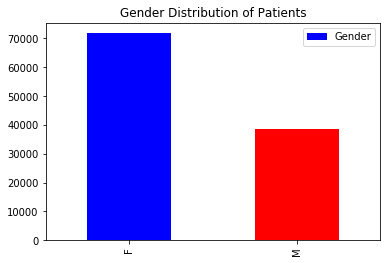

In [18]:
df['Gender'].value_counts().plot(kind = 'bar', title='Gender Distribution of Patients', color=['blue','red'])
plt.legend()
plt.show()

The above analysis displayed that a female patient is more likely to go for an appointment than a male patient. The bar chart has increasingly more females than males.

### Does gender have an effect in show up?

In [19]:
df.groupby(['Gender','No_show']).count()

ScheduledDay  AppointmentDay    Age  Scholarship  \
Gender No_show                                                     
F      False           14594           14594  14594        14594   
       True            57245           57245  57245        57245   
M      False            7725            7725   7725         7725   
       True            30962           30962  30962        30962   

                Hypertension  Diabetes  Alcoholism  Handcap  SMS_received  
Gender No_show                                                             
F      False           14594     14594       14594    14594         14594  
       True            57245     57245       57245    57245         57245  
M      False            7725      7725        7725     7725          7725  
       True            30962     30962       30962    30962         30962

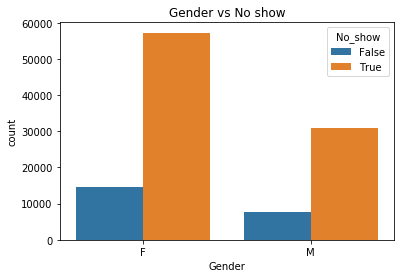

In [20]:
#plot the relationship between gender and no show
def attendance(df, col_name, noshow):
    sns.countplot(x = 'Gender', hue = 'No_show', data = df)
    plt.title('Gender vs No show')
    plt.show()
attendance(df, 'Gender', 'No_show')

Here it is shown that the ratio of females to males showing up is higher for females than males. This is also similar to females having higher rate of not showing up than males.

### Does the age of the gender have an effect in show up

In [21]:
#create two dataframes to separate the age of people below 50 and above 50
below_50 = df[df['Age'] <=50]
above_50 = df[df['Age'] >=50]

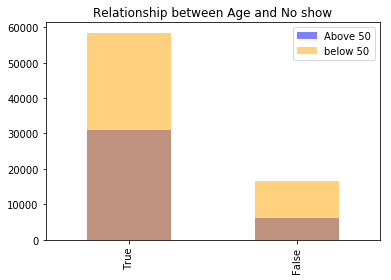

In [22]:
#plot the age of the gender in respect to no show
above_50['No_show'].value_counts().plot(kind='bar',alpha=0.5, color = 'blue', label='Above 50')
below_50['No_show'].value_counts().plot(kind='bar',alpha=0.5, color='orange', label='below 50')
plt.title('Relationship between Age and No show')
plt.legend();

Here, the visualization displayed both ages above 50 and below 50. Both ages have proximity in showing up and the ages below 50 tend not to show up compared to the ages above 50.

### Does having a scholarship affect the number of show up for appointment?

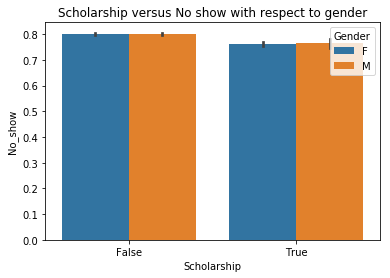

In [23]:
# plot the relationship between scholarship and no show with respect to gender
sns.barplot(x = 'Scholarship', y = 'No_show', hue = 'Gender', data = df)
plt.title('Scholarship versus No show with respect to gender')
plt.show()

The above visualization displayed little difference in the relationship between scholarship and no show.

### Does the diseases affect whether a patient shows up or not?

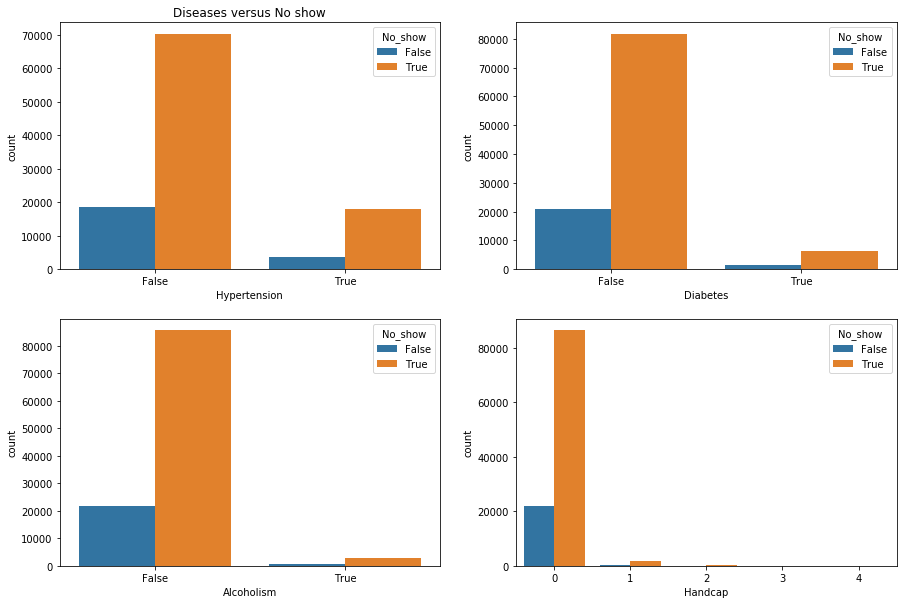

In [24]:
# plot diseases versus no show
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.title('Diseases versus No show')
sns.countplot(x = 'Hypertension', hue= 'No_show', data = df)
plt.subplot(2,2,2)
sns.countplot(x = 'Diabetes', hue= 'No_show', data = df)
plt.subplot(2,2,3)
sns.countplot(x = 'Alcoholism', hue= 'No_show', data = df)
plt.subplot(2,2,4)
sns.countplot(x = 'Handcap', hue= 'No_show', data = df)
plt.show()

Summary of the above visualization shows that disease affect showing up of patients. in order words, patients that had diseases showed up for their appointment.

<a id='conclusions'></a>
## Conclusions

In conclusion, The analysis aim was to find relationships between variables and draw insights from them. From the exploratory analysis the results were: 1 The variable, Gender which consists of females and males has been visualized with a bar chart and the outcome was that female patients were more likely to attend an appointment than males in the dataset. 2 Gender column was plotted using count plot to find a relationship between No show column and gender to know the percentage of what gender showed up and didn't. Females had a higher percentage of showing up and a higher percentage of those who didn't show up than males. 3 Although Younger patients didn't turn up for an appointment. There was the proximity of both ages above 50 and below 50 showing up for their appointment. 4 Scholarship didn't affect the showing up of patients. The visualization showed that both with those or without scholarships went for their appointment. 5 The diseases of patients influenced patients showing up for an appointment. patients with no disease barely showed up.

## Limitation
No clear correlation of scholarship and No show in the dataset

In [25]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0